## <span style="color:rgb(25,25,112)">Import des bibliotheques</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline

## <span style="color:rgb(25,25,112)">Import du fichier CSV</span>


In [2]:
df = pd.read_csv('music_genre.csv', header=0)

**Premières 5 lignes de notre DataFrame**

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


**Info sur les colonnes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Obtenir des statistiques de base sur les données <span style="color:red">numériques</span> :**

In [5]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


**Obtenir des statistiques de base sur les données <span style="color:red">qualitatives</span> :**

In [6]:
df.describe(include = object)

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


> Les valeurs `empty_field` et `?` dans le dataset sont traitées comme des chaînes valides au lieu de valeurs manquantes, nécessitant leur conversion en `NaN` pour une gestion correcte.

## <span style="color:rgb(25,25,112)">Préparation de données</span>


**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">avant</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [7]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

**Remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>**

In [8]:
df.replace(['empty_field', '?'], np.nan, inplace=True)

**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">après</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [9]:
df.isnull().sum()

instance_id            5
artist_name         2494
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64

**Remplacement sur les données <span style="color:red">numériques</span> :**

In [10]:
# Création d'un impute pour remplacer les valeurs manquantes des colonnes numériques
imputer_num = SimpleImputer(strategy="median")

# Sélection
numerical_cols = df.select_dtypes(include=['float64']).columns

# Application de l'impute sur les colonnes numériques
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


**Remplacement sur les données <span style="color:red">qualitatives/catégoriels</span> :**

In [11]:
# Création d'un impute pour les attributs catégoriels
imputer_cat = SimpleImputer(strategy="most_frequent")

# Sélection
categorical_cols = df.select_dtypes(include=['object']).columns

# Application de l'impute sur les colonnes catégorielles
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


**Supprimer `music_genre`, pour que le modèle ne soit pas influencé par cette colonne**

In [12]:
# Supprimer la colonne 'music_genre' et la stocker dans une variable séparée
labels = df['music_genre'].copy()
df = df.drop('music_genre', axis=1)


**Suppression des Colonnes Inutiles**


In [13]:
df.drop(['artist_name', 'track_name', 'obtained_date'], axis=1, inplace=True)

**Convertir tempo en Type Numérique**

In [14]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

>La colonne `tempo` contient des valeurs numériques, mais elle est stockée en tant que type objet,

**Encodage des Données Catégorielles**

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,...,0,0,1,0,0,0,0,0,0,1
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,...,0,0,0,0,0,0,0,0,1,0
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,...,0,1,0,0,0,0,0,0,0,0
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,...,0,0,0,0,0,0,1,0,0,0


> l'encodage One-Hot créera une nouvelle colonne pour chaque catégorie unique des données catégorielles, avec des 1 et des 0 indiquant la présence d'une catégorie pour chaque observation 

**Standardisation des données numériques**

In [16]:
# Création d'un objet StandardScaler
scaler = StandardScaler()

# Application de la standardisation aux caractéristiques numériques
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.drop(['instance_id'], axis=1, inplace=True)

>La standardisation des données numériques assure que chaque caractéristique contribue équitablement au modèle, évitant ainsi que les variables à grande échelle dominent indûment le processus d'analyse.

## <span style="color:rgb(25,25,112)">Analyse en Composantes Canoniques</span>

**Séparation du dataframe en deux ensembles de variables X et Y.**

In [19]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
Y = df.drop(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'], axis=1)


**Application de la CCA**

In [20]:
from sklearn.cross_decomposition import CCA

# Le nombre de composantes est généralement le rang le plus bas entre X et Y
n_components = min(X.shape[1], Y.shape[1])

cca = CCA(n_components=n_components)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)


**Corrélation entre les ensembles de composantes canoniques**

In [21]:
correlations = np.corrcoef(X_c.T, Y_c.T)[:n_components, n_components:]
print("Corrélations entre les composantes canoniques :")
print(correlations)


Corrélations entre les composantes canoniques :
[[ 6.48163035e-01  1.55062824e-16  2.44277638e-16  3.39736057e-16
   5.10778306e-16  4.22882857e-16 -1.14750532e-16  2.17815479e-16]
 [ 6.48877362e-05  3.56081847e-01  9.05096079e-17 -7.91466375e-17
  -1.84283809e-16 -4.43393094e-16  8.95320578e-17 -9.85539836e-17]
 [-2.03141324e-08 -8.69845149e-05  1.71815425e-01 -1.16393189e-16
  -1.07670209e-16 -2.53094406e-16 -2.14902161e-16 -9.89003725e-17]
 [-1.78530677e-10 -9.01011699e-07 -5.40760049e-05  1.06143120e-01
   1.53369740e-16  3.58923518e-16  0.00000000e+00  1.47074092e-16]
 [-8.61745483e-14 -4.70108452e-10  5.44095543e-09 -9.13547422e-06
   4.64741231e-02 -4.64243092e-18 -3.49970839e-18 -7.74571346e-17]
 [-1.62168164e-14 -7.83888909e-11  5.14990099e-10 -9.13906287e-07
  -2.93525831e-05  3.60328867e-02 -7.82257039e-17  3.72409511e-17]
 [-5.19092596e-17 -1.89320247e-12  8.01379762e-12 -1.46810022e-08
   1.55370298e-08 -1.94140317e-05  2.97626972e-02 -1.25199292e-17]
 [-2.31787942e-16 -1.

>En analysant notre dataset via l'Analyse en Composantes Canoniques, nous avons identifié une corrélation significative entre les caractéristiques des morceaux de musique et leur réception par le public, particulièrement mise en évidence par les deux premières paires de composantes canoniques. Cette forte corrélation pour la première paire (0.648) et une corrélation notable pour la deuxième (0.356) révèlent des interactions intéressantes qui méritent une exploration plus approfondie. Ces résultats nous encouragent à examiner plus en détail les caractéristiques qui influencent le plus la popularité des morceaux, nous offrant ainsi des insights précieux pour guider la création et la promotion de la musique à l'avenir.

**Visualisation des Scores Canoniques**

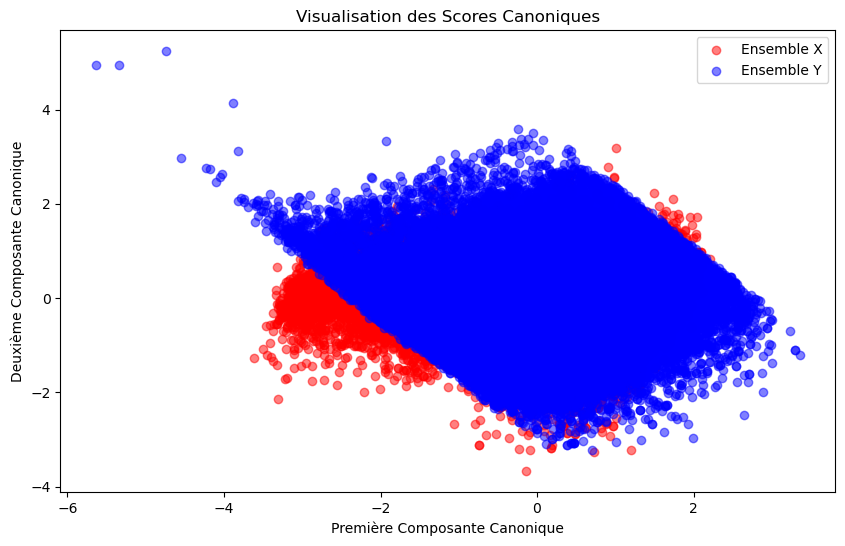

In [23]:
# Projections des ensembles X et Y sur l'espace des composantes canoniques
X_c, Y_c = cca.transform(X, Y)

plt.figure(figsize=(10, 6))

# Diagramme de dispersion pour les scores canoniques du premier ensemble
plt.scatter(X_c[:, 0], X_c[:, 1], color='red', alpha=0.5, label='Ensemble X')

# Diagramme de dispersion pour les scores canoniques du deuxième ensemble
plt.scatter(Y_c[:, 0], Y_c[:, 1], color='blue', alpha=0.5, label='Ensemble Y')

plt.title('Visualisation des Scores Canoniques')
plt.xlabel('Première Composante Canonique')
plt.ylabel('Deuxième Composante Canonique')
plt.legend()
plt.show()


**Calcul des Scores et visualisation des orrélations**

In [25]:
# Initialisation et ajustement de la CCA
cca = CCA(n_components=2)
cca.fit(X, Y)

# Obtention des scores transformés
U_, V_ = cca.transform(X, Y)


# Calcul de la corrélation entre les scores
corr_cca = pd.DataFrame(np.corrcoef(U_.T, V_.T), index=["$U_1$", "$U_2$", "$V_1$", "$V_2$"], columns=["$U_1$", "$U_2$", "$V_1$", "$V_2$"])
corr_cca.style.background_gradient(cmap='coolwarm')


,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,-0.000000,0.648163,0.000000
$U_2$,-0.000000,1.000000,0.000065,0.356082
$V_1$,0.648163,0.000065,1.000000,0.000000
$V_2$,0.000000,0.356082,0.000000,1.000000


In [28]:
score_corr = np.round(corr_cca.loc["$U_1$", "$V_1$"], decimals=3)
print("Corrélation entre $U_1$ et $V_1$: ", score_corr)

Corrélation entre $U_1$ et $V_1$:  0.648


>La corrélation de 0.648 entre les premières composantes canoniques U1 et V1 est significative, révélant que les variations dans l'ensemble de données X sont bien reflétées et correspondantes aux variations dans l'ensemble de données Y pour ces composantes spécifiques.

**Cercle de corrélation**

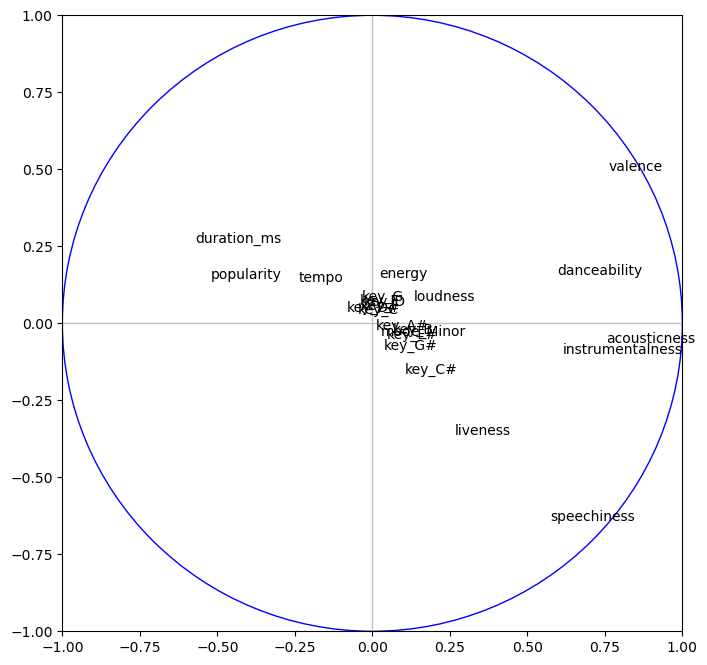

In [42]:
# Concaténation des datasets X et Y
scaled_data = np.concatenate((X, Y), axis=1)


# Conversion en DataFrame pour une utilisation plus aisée
column_names = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor']
scaled_data = pd.DataFrame(scaled_data, columns=column_names)


# Calcul de C1 et C2 comme moyennes des scores U_ et V_
C1 = np.array((1/2)*(U_[:,0] + V_[:,0]))
C2 = np.array((1/2)*(U_[:,1] + V_[:,1]))
Caxes = np.array([C1, C2])


# Calcul de la corrélation des variables avec les axes C1 et C2
corvar = np.corrcoef(Caxes, scaled_data.T)[:2, 2:]  


fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Annotation des variables avec leurs coordonnées
for j in range(scaled_data.shape[1]):
    plt.annotate(scaled_data.columns[j], (corvar[0, j], corvar[1, j]))

# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Ajout d'un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

# Affichage du cercle de corrélation
plt.show()


In [46]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
count,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,50005.000000,...,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000
mean,9.792178e-15,-1.597174e-15,2.890066e-16,-1.471731e-15,1.836012e-15,-1.394696e-14,-4.141739e-16,-2.029529e-16,9.559019e-16,119.957650,...,0.110429,0.108089,0.105289,0.031797,0.075192,0.086811,0.062014,0.114629,0.066373,0.357984
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,29.074246,...,0.313427,0.310496,0.306929,0.175461,0.263704,0.281561,0.241183,0.318576,0.248936,0.479412
min,-2.845395e+00,-8.975842e-01,-2.791616e+00,-1.719619e+00,-2.264151e+00,-5.580379e-01,-1.139770e+00,-6.151970e+00,-7.031997e-01,34.347000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.576441e-01,-8.386958e-01,-6.507732e-01,-3.610281e-01,-6.303650e-01,-5.580379e-01,-6.000766e-01,-2.799810e-01,-5.670622e-01,96.777000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.015753e-02,-4.756969e-01,5.463001e-02,-1.532210e-02,1.634546e-01,-5.575524e-01,-4.200344e-01,3.013437e-01,-4.407897e-01,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.579591e-01,7.196504e-01,7.208441e-01,3.679934e-01,8.136306e-01,-8.169324e-02,3.100335e-01,6.426743e-01,4.851620e-02,139.465000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.524820e+00,2.020470e+00,2.394777e+00,3.582467e+01,1.509168e+00,2.502861e+00,4.987418e+00,2.089617e+00,8.369676e+00,220.276000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Conclusion

>L'analyse du cercle de corrélation révèle que des attributs comme la valence, la speechiness, et l'acousticness démontrent une corrélation modérée à forte avec nos composantes canoniques, suggérant que ces caractéristiques sont particulièrement saillantes dans la relation étudiée. La proximité de la duration_ms et de la popularité vers le milieu du cercle, mais légèrement en dehors du centre, indique une influence mesurée sur nos composantes, soulignant une association moins directe mais toujours présente. En revanche, les variables encodées telles que les tonalités (key_A#, key_B, etc.) sont regroupées vers le centre, signalant une contribution relativement faible à la variation expliquée par les composantes canoniques, ce qui est cohérent avec leur nature catégorielle et binaire.

>